# Heart Disease Prediction 

In [8]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn
% matplotlib inline

In [9]:
# dataset
disease_df=pd.read_csv("framingham.csv")
disease_df.drop(['education'],inplace=True,axis=1)
disease_df.rename(columns={'male':'Sex_male'},inplace=True)

In [10]:
# removing NaN/NULL values
disease_df.dropna(axis=0,inplace=True)
print(disease_df.head(),disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

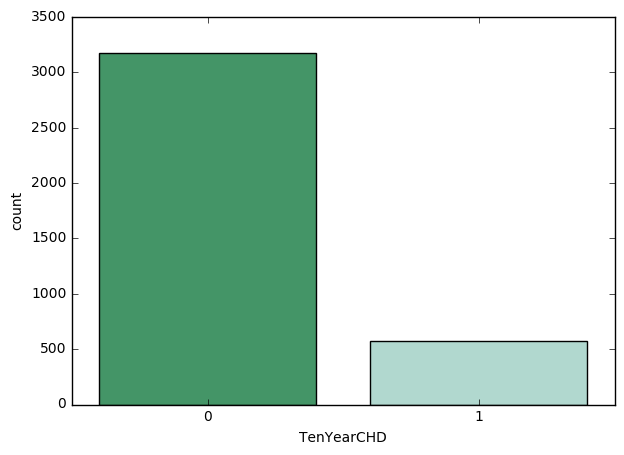

In [11]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7,5))
sn.countplot(x='TenYearCHD',data=disease_df,palette='BuGn_r')
plt.show()

In [13]:
X=np.asarray(disease_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
y=np.asarray(disease_df['TenYearCHD'])

# normalisation of the dataset
X=preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
print('Train set:',X_train.shape,y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


In [14]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

# Evaluation and accuracy
from sklearn.metrics import jaccard_similarity_score
print('')
print('Accuracy of the model in jaccard similarity score is ',jaccard_similarity_score(y_test,y_pred))


Accuracy of the model in jaccard similarity score is  0.8490230905861457


/home/user/anaconda3/lib/python3.5/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


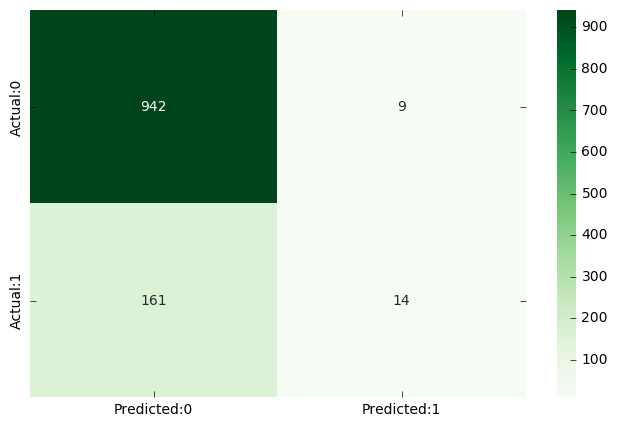

The details for confusion matrix is 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [16]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sn.heatmap(conf_matrix,annot=True,fmt='d',cmap='Greens')
plt.show()

print('The details for confusion matrix is ')
print(classification_report(y_test,y_pred))